# 第10篇：分类数据处理
分类数据(categorical data)是按照现象的某种属性对其进行分类或分组而得到的反映事物类型的数据，又称定类数据。例如，按照性别将人口分为男、女两类；按照经济性质将企业分为国有、集体、私营、其他经济等。“男”、“女”，“国有”、“集体”、“私营”和“其他经济”就是分类数据。

为了便于计算机处理，通常用数字代码来表述各个类别，比如，用1表示“男性”，0表示“女性”，但是1和0等只是数据的代码，它们之间没有数量上的关系和差异。

In [2]:
import pandas as pd
import numpy as np

## 第一部分：分类数据创建
分类数据（Categorical data）具有较高的理解和执行效率，可以通过多种方式创建 Series 或者 DataFrame 中的列。

### Series 创建
创建分类数据：这里以血型为例，假定每个用户有以下的血型，我们如何创建一个关于血型的分类对象呢？  
使用 dtype="category" 来指定数据类型：

In [3]:
blood = pd.Series(data=["A", "AB", np.nan, "AB", "O", "B"], name="blood_type", dtype="category")
blood

0      A
1     AB
2    NaN
3     AB
4      O
5      B
Name: blood_type, dtype: category
Categories (4, object): ['A', 'AB', 'B', 'O']

.astype('category') 可以转换为分类数据：

In [4]:
blood = pd.Series(data=["A", "AB", np.nan, "AB", "O", "B"], name="blood_type")
blood.astype('category')

0      A
1     AB
2    NaN
3     AB
4      O
5      B
Name: blood_type, dtype: category
Categories (4, object): ['A', 'AB', 'B', 'O']

一些特殊的方法下，会自动创建分类数据类型：

In [5]:
bins = [0,20,30,40,100]
labels = ['20岁及以下','21岁到30岁','31岁到40岁','41岁以上']
age = pd.Series([18, 30, 35, 18, np.nan, 30, 37, 25], name='age')
pd.cut(age,bins=bins, labels=labels) #可选label添加自定义标签

0     20岁及以下
1    21岁到30岁
2    31岁到40岁
3     20岁及以下
4        NaN
5    21岁到30岁
6    31岁到40岁
7    21岁到30岁
Name: age, dtype: category
Categories (4, object): ['20岁及以下' < '21岁到30岁' < '31岁到40岁' < '41岁以上']

### pd.Categorical
pandas.Categorical 可以创建一个类型数据序列到 DataFrame 中：

In [6]:
pd.Categorical(["A", "AB", np.nan, "AB", "O", "B"])

['A', 'AB', NaN, 'AB', 'O', 'B']
Categories (4, object): ['A', 'AB', 'B', 'O']

In [7]:
#定制分类数据所有可能的取值
pd.Categorical(["A", "AB", np.nan, "AB", "O", "B"], categories=["A", "B", "AB"])

['A', 'AB', NaN, 'AB', NaN, 'B']
Categories (3, object): ['A', 'B', 'AB']

### DataFrame 创建
与将单个列转换为分类相似，可以在构造期间或构造之后将 DataFrame 中的所有列批量转换为分类的类别。

In [8]:
data = {
    "blood": ["A", "AB","AB", "O", "B"],
    'sex': ['男', '男', '女', '男', '男']
}
user_info = pd.DataFrame(data, dtype="category")
user_info.dtypes

blood    category
sex      category
dtype: object

也可以用 df.astype('category') 进行转换。

### CategoricalDtype
CategoricalDtype 是 pandas 的类型数据对象，它可以传入以下参数：

categories: 没有缺失值的不重复序列  
ordered: 布尔值，顺序的控制，默认是没有顺序的

In [9]:
pd.CategoricalDtype(['a', 'b', 'c'])
# CategoricalDtype(categories=['a', 'b', 'c'], ordered=False)

CategoricalDtype(categories=['a', 'b', 'c'], ordered=False)

In [10]:
pd.CategoricalDtype(['a', 'b', 'c'], ordered=True)
# CategoricalDtype(categories=['a', 'b', 'c'], ordered=True)

CategoricalDtype(categories=['a', 'b', 'c'], ordered=True)

In [11]:
pd.CategoricalDtype()
# CategoricalDtype(categories=None, ordered=False)

CategoricalDtype(categories=None, ordered=False)

CategoricalDtype 可以在 Pandas 指定 dtype 的任何地方，例如pandas.read_csv()，pandas.DataFrame.astype() 或 Series 构造函数中。

为方便起见，当您希望类别的默认行为是无序的并且等于数组中的设置值时，可以使用字符串 'category' 代替 CategoricalDtype。 换句话说，dtype='category' 等效于 dtype = CategoricalDtype()。

只要 CategoricalDtype 的两个实例具有相同的类别和顺序，它们的比较就相等。 比较两个无序分类时，不考虑类别的顺序。

### 控制行为
以上的例子中我们使用 dtype='category' 指定了分类数据类型，其中：
- 具体分类是从数据中推断出来的  
- 具体分类数据是没有顺序的  

我们也可以使用 CategoricalDtype 实例来定义分类数据，同时还可以给定顺序：

In [12]:
s = pd.Series(["a", "b", "c", "a"])
cat_type = pd.CategoricalDtype(categories=["b", "c", "d"],ordered=True)
s_cat = s.astype(cat_type)
s_cat

0    NaN
1      b
2      c
3    NaN
dtype: category
Categories (3, object): ['b' < 'c' < 'd']

同样，CategoricalDtype可与DataFrame一起使用，以确保类别在所有列之间是一致的。

In [13]:
df = pd.DataFrame({'A': list('abca'), 'B': list('bccd')})
cat_type = pd.CategoricalDtype(categories=list('abcd'),
                            ordered=True)
df_cat = df.astype(cat_type)
df_cat['A']

0    a
1    b
2    c
3    a
Name: A, dtype: category
Categories (4, object): ['a' < 'b' < 'c' < 'd']

可以抽取分类数据:

categories = pd.unique(df.to_numpy().ravel())  
如果已经有了 code 和类别，则可以使用 from_codes() 构造函数在常规构造函数模式下保存分解步骤:

In [14]:
splitter = np.random.choice([0, 1], 5, p=[0.5, 0.5])
s = pd.Series(pd.Categorical.from_codes(splitter,categories=["train", "test"]))
s

0     test
1     test
2    train
3    train
4     test
dtype: category
Categories (2, object): ['train', 'test']

### 重新获取原始数据
若要返回原始 Series 或 NumPy 数组，请使用 Series.astype(original_dtype) 或np.asarray(original_dtype)：

In [15]:
blood = pd.Series(data=["A", "AB", np.nan, "AB", "O", "B"], dtype="category")
blood

0      A
1     AB
2    NaN
3     AB
4      O
5      B
dtype: category
Categories (4, object): ['A', 'AB', 'B', 'O']

In [16]:
blood.astype(str)

0      A
1     AB
2    NaN
3     AB
4      O
5      B
dtype: object

In [17]:
np.asarray(blood)

array(['A', 'AB', nan, 'AB', 'O', 'B'], dtype=object)

## 第二部分：分类数据使用

### 分类数据结构
一个分类变量包括三个部分，元素值（values）、分类类别（categories）、是否有序（order）。 
从上面可以看出，使用cat函数创建的分类变量默认为有序分类变量
下面介绍如何获取或修改这些属性

让我们来看一下cat还有什么其它的属性和方法可以使用。下面cat的这些属性基本都是关于查看和操作Category数据类型的。

In [18]:
[i for i in dir(blood.cat) if not i.startswith('_')]

['add_categories',
 'as_ordered',
 'as_unordered',
 'categories',
 'codes',
 'ordered',
 'remove_categories',
 'remove_unused_categories',
 'rename_categories',
 'reorder_categories',
 'set_categories']

#### describe方法
该方法描述了一个分类序列的情况，包括非缺失值个数、元素值类别数（不是分类类别数）、最多次出现的元素及其频数

In [19]:
blood

0      A
1     AB
2    NaN
3     AB
4      O
5      B
dtype: category
Categories (4, object): ['A', 'AB', 'B', 'O']

In [20]:
blood.describe()

count      5
unique     4
top       AB
freq       2
dtype: object

#### categories属性
查看分类类别

In [21]:
blood.cat.categories

Index(['A', 'AB', 'B', 'O'], dtype='object')

#### ordered属性
查看是否排序

In [22]:
blood.cat.ordered

False

### 分类数据修改

#### set_categories
修改分类，但本身值不会变化

In [23]:
blood.cat.set_categories(['RH', 'A', 'O'])

0      A
1    NaN
2    NaN
3    NaN
4      O
5    NaN
dtype: category
Categories (3, object): ['RH', 'A', 'O']

修改分类，但本身值不会变化

#### rename_categories
需要注意的是该方法会把值和分类同时修改

In [24]:
blood.cat.rename_categories(['new_%s'%i for i in blood.cat.categories])

0     new_A
1    new_AB
2       NaN
3    new_AB
4     new_O
5     new_B
dtype: category
Categories (4, object): ['new_A', 'new_AB', 'new_B', 'new_O']

利用字典修改值

In [25]:
blood.cat.rename_categories({"A": 'a', "B": 'b'})

0      a
1     AB
2    NaN
3     AB
4      O
5      b
dtype: category
Categories (4, object): ['a', 'AB', 'b', 'O']

### 分类数据添加

#### 利用add_categories添加

In [26]:
blood = pd.Series(data=pd.Categorical(["A", "AB", "RH", "AB", "O", "B"], categories=['A', 'B', 'AB', 'O']))
blood

0      A
1     AB
2    NaN
3     AB
4      O
5      B
dtype: category
Categories (4, object): ['A', 'B', 'AB', 'O']

In [27]:
blood.cat.add_categories(['RH'])

0      A
1     AB
2    NaN
3     AB
4      O
5      B
dtype: category
Categories (5, object): ['A', 'B', 'AB', 'O', 'RH']

### 分类数据删除

#### remove_categories

In [28]:
blood.cat.remove_categories(['A'])

0    NaN
1     AB
2    NaN
3     AB
4      O
5      B
dtype: category
Categories (3, object): ['B', 'AB', 'O']

#### 删除元素值未出现的分类类型

In [29]:
blood = pd.Series(data=pd.Categorical(["AB", "AB", "O", "B"], categories=['A', 'B', 'AB', 'O']))
blood

0    AB
1    AB
2     O
3     B
dtype: category
Categories (4, object): ['A', 'B', 'AB', 'O']

In [30]:
blood.cat.remove_unused_categories()

0    AB
1    AB
2     O
3     B
dtype: category
Categories (3, object): ['B', 'AB', 'O']

### 顺序
新的分类数据不会自动排序。 您必须显式传递 ordered=True 来指示有序的分类。

查看分类数据的顺序：

In [31]:
blood = pd.Series(data=pd.Categorical(["A", "AB", "RH", "AB", "O", "B"], categories=['A', 'B', 'AB', 'O']))
blood.cat.categories

Index(['A', 'B', 'AB', 'O'], dtype='object')

In [32]:
blood.cat.ordered

False

#### as_ordered
一般来说会将一个序列转为有序变量，可以利用as_ordered方法

In [33]:
blood.cat.as_ordered()

0      A
1     AB
2    NaN
3     AB
4      O
5      B
dtype: category
Categories (4, object): ['A' < 'B' < 'AB' < 'O']

In [34]:
blood.cat.as_ordered().cat.ordered

True

In [35]:
blood.cat.as_ordered().cat.as_unordered()

0      A
1     AB
2    NaN
3     AB
4      O
5      B
dtype: category
Categories (4, object): ['A', 'B', 'AB', 'O']

#### set_categories
利用set_categories方法中的order参数

In [36]:
blood.cat.set_categories(['RH', 'A', 'O'], ordered=True)

0      A
1    NaN
2    NaN
3    NaN
4      O
5    NaN
dtype: category
Categories (3, object): ['RH' < 'A' < 'O']

#### reorder_categories
这个方法的特点在于，新设置的分类必须与原分类为同一集合

In [37]:
blood.cat.reorder_categories(['AB', 'A', 'B', 'O'], ordered=True)

0      A
1     AB
2    NaN
3     AB
4      O
5      B
dtype: category
Categories (4, object): ['AB' < 'A' < 'B' < 'O']

### 排序

In [38]:
s = pd.Series(np.random.choice(['perfect','good','fair','bad','awful'],50)).astype('category')
s.cat.set_categories(['perfect','good','fair','bad','awful'][::-1],ordered=True).head()

0     good
1     fair
2     good
3    awful
4      bad
dtype: category
Categories (5, object): ['awful' < 'bad' < 'fair' < 'good' < 'perfect']

In [39]:
s.sort_values(ascending=False).head()

49    perfect
36    perfect
15    perfect
27    perfect
28    perfect
dtype: category
Categories (5, object): ['awful', 'bad', 'fair', 'good', 'perfect']

In [40]:
df_sort = pd.DataFrame({'cat':s.values,'value':np.random.randn(50)}).set_index('cat')
df_sort.head()

,value
cat,
good,-0.881925
fair,-0.798461
good,-1.335855
awful,0.985629
bad,1.423465


In [41]:
df_sort.sort_index().head()

,value
cat,
awful,0.257634
awful,0.012458
awful,0.153295
awful,-0.093060
awful,0.010395


### 对比
在以下三种情况下，可以将分类数据与其他对象进行比较：

- 相等性（==和!=）与长度与分类数据相同的类似列表的对象（列表，序列，数组等）进行比较  
- 当 ordered == True 并且类别相同时，分类数据与另一个分类系列的所有比较（==，！=，>，> =，<和<=）
- 分类数据与标量的所有比较。

所有其他比较，特别是两个具有不同类别的分类或与任何类似列表的对象的分类的“非相等”比较，都会引发TypeError。

将分类数据与具有不同类别或排序的 Series，np.array，列表或分类数据进行的任何“非相等”比较都会引发 TypeError，因为自定义类别的排序可以通过两种方式进行解释：一种考虑了排序，另一种没考虑。

#### 与标量或等长序列的比较

In [42]:
s = pd.Series(["a", "d", "c", "a"]).astype('category')
s == 'a'

0     True
1    False
2    False
3     True
dtype: bool

In [43]:
s == list('abcd')

0     True
1    False
2     True
3    False
dtype: bool

#### 与另一分类变量的比较

##### 等式判别（包含等号和不等号）  
两个分类变量的等式判别需要满足分类完全相同

In [44]:
s = pd.Series(["a", "d", "c", "a"]).astype('category')
s == s

0    True
1    True
2    True
3    True
dtype: bool

In [45]:
s != s

0    False
1    False
2    False
3    False
dtype: bool

In [46]:
s_new = s.cat.set_categories(['a','d','e'])
#s == s_new #报错

##### 不等式判别（包含>=,<=,<,>）
两个分类变量的不等式判别需要满足两个条件：① 分类完全相同 ② 排序完全相同

In [47]:
s = pd.Series(["a", "d", "c", "a"]).astype('category')
#s >= s #报错

In [48]:
s = pd.Series(["a", "d", "c", "a"]).astype('category').cat.reorder_categories(['a','c','d'],ordered=True)
s >= s

0    True
1    True
2    True
3    True
dtype: bool

## 第三部分：为什么使用分类数据

分类数据可以实现的功能事实上不用分类数据类型也可以实现，那么分类数据类型到底有什么特点呢？我们知道当数据量较大的时候，内存占用是一个很大的问题，虽然我们没有经常性的在内存中运行上g的数据，但是我们也总会遇到执行几行代码会等待很久的情况。使用Category数据的一个好处就是：可以很好的节省在时间和空间的消耗。下面我们通过几个实例来学习一下。使用分类数据类型的最重要的原因之一就是pandasCategorical数据实际上是一个表示类别的唯一（向下转换）整数的映射，其中整数本身占用（大概）比组成object数据类型的字符串少。Categorical 的内存使用量是与分类数乘以数据长度成正比，object 类型的数据是一个常数乘以数据的长度。

### 内存占用

In [49]:
colors = pd.Series([
    'periwinkle',
    'mint green',
    'burnt orange',
    'periwinkle',
    'burnt orange',
    'rose',
    'rose',
    'mint green',
    'rose',
    'navy'
])
import sys
colors.apply(sys.getsizeof)

0    59
1    59
2    61
3    59
4    61
5    53
6    53
7    59
8    53
9    53
dtype: int64

上面我们通过使用sys.getsizeof来显示内存占用的情况，数字代表字节数。

还有另一种计算内容占用的方法：memory_usage()，后面会使用。

现在我们将上面colors的不重复值映射为一组整数，然后再看一下占用的内存。

In [50]:
mapper = {v: k for k, v in enumerate(colors.unique())}
mapper

{'periwinkle': 0, 'mint green': 1, 'burnt orange': 2, 'rose': 3, 'navy': 4}

In [51]:
as_int = colors.map(mapper)
as_int

0    0
1    1
2    2
3    0
4    2
5    3
6    3
7    1
8    3
9    4
dtype: int64

In [52]:
as_int.apply(sys.getsizeof)

0    24
1    28
2    28
3    24
4    28
5    28
6    28
7    28
8    28
9    28
dtype: int64

注：对于以上的整数值映射也可以使用更简单的pd.factorize()方法代替。
我们发现上面所占用的内存是使用object类型时的一半。其实，这种情况就类似于Category data类型内部的原理。

### 分类变量的特点
Categorical所占用的内存与Categorical分类的数量和数据的长度成正比，相反，object所占用的内存则是一个常数乘以数据的长度。 

下面是object内存使用和category内存使用的情况对比。

In [53]:
colors.memory_usage(index=False, deep=True)

650

In [54]:
colors.astype('category').memory_usage(index=False, deep=True)

507

上面结果是使用object和Category两种情况下内存的占用情况。我们发现效果并没有我们想象中的那么好。但是注意Category内存是成比例的，如果数据集的数据量很大，但不重复分类（unique）值很少的情况下，那么Category的内存占用可以节省达到10倍以上，比如下面数据量增大的情况：

In [55]:
manycolors = colors.repeat(10)
len(manycolors) / manycolors.nunique()

20.0

In [56]:
manycolors.memory_usage(index=False, deep=True)

6500

In [57]:
manycolors.astype('category').memory_usage(index=False, deep=True)

597

可以看到，在数据量增加10倍以后，使用Category所占内容节省了10倍以上。

我们再看一个例子

In [58]:
blood_type = pd.Series(["AB","O"]*1000)
blood_type

0       AB
1        O
2       AB
3        O
4       AB
        ..
1995     O
1996    AB
1997     O
1998    AB
1999     O
Length: 2000, dtype: object

In [59]:
blood_type.nbytes

16000

In [60]:
blood_type.astype("category").nbytes

2016

In [61]:
blood_type = pd.Series(['AB%4d' % i for i in range(2000)])
blood_type

0       AB   0
1       AB   1
2       AB   2
3       AB   3
4       AB   4
         ...  
1995    AB1995
1996    AB1996
1997    AB1997
1998    AB1998
1999    AB1999
Length: 2000, dtype: object

In [62]:
blood_type.nbytes

16000

In [63]:
blood_type.astype("category").nbytes

20000

Text(0.5, 1.0, 'Memory usage of object vs. category dtype')

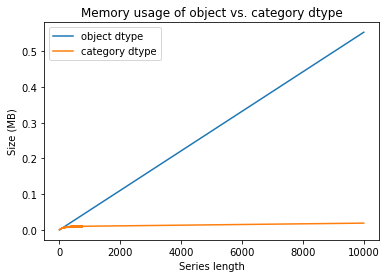

In [64]:
import string

import matplotlib.pyplot as plt

np.random.seed(444)

# %matplotlib inline 可以在Ipython编译器里直接使用，功能是可以内嵌绘图，并且可以省略掉plt.show()这一步。
%matplotlib inline

def mem_usage(obj, index=False, total=True, deep=True):
    """Memory usage of pandas Series or DataFrame."""
    # Ported from https://www.dataquest.io/blog/pandas-big-data/
    usg = obj.memory_usage(index=index, deep=deep)
    if isinstance(obj, pd.DataFrame) and total:
        usg = usg.sum()
    # Bytes to megabytes
    return usg / 1024 ** 2

catgrs = tuple(string.printable)

lengths = np.arange(1, 10001, dtype=np.uint16)
sizes = []
for length in lengths:
    obj = pd.Series(np.random.choice(catgrs, size=length))
    cat = obj.astype('category')
    sizes.append((mem_usage(obj), mem_usage(cat)))
sizes = np.array(sizes)

fig, ax = plt.subplots()
ax.plot(sizes)
ax.set_ylabel('Size (MB)')
ax.set_xlabel('Series length')
ax.legend(['object dtype', 'category dtype'])
ax.set_title('Memory usage of object vs. category dtype')

可以看到，分类数据类型随着数据个数的增多内存使用量并不会发生大的变化，而object类型随着数据个数的增多成直线型增长趋势。

除了占用内存节省外，另一个额外的好处是计算效率有了很大的提升。因为对于Category类型的Series，str字符的操作发生在.cat.categories的非重复值上，而并非原Series上的所有元素上。也就是说对于每个非重复值都只做一次操作，然后再向与非重复值同类的值映射过去。

但是Category数据的使用不是很灵活。例如，插入一个之前没有的值，首先需要将这个值添加到.categories的容器中，然后再添加值。

In [65]:
ccolors = colors.astype('category')

```python
ccolors.iloc[5] = 'a new color'
ValueError                                Traceback (most recent call last)
<ipython-input-15-1766a795336d> in <module>
----> 1 ccolors.iloc[5] = 'a new color'
```
ValueError: Cannot setitem on a Categorical with a new category, set the categories first
```

In [67]:
ccolors = ccolors.cat.add_categories(['a new color'])
ccolors.iloc[5] = 'a new color' 

如果你想设置值或重塑数据，而非进行新的运算操作，那么Category类型不是那么有用。